## WeatherPy

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

## Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

#Set units for search
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
            
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | malmberget
Processing Record 2 of Set 1 | carutapera
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | mbeya
Processing Record 7 of Set 1 | hanceville
Processing Record 8 of Set 1 | slave lake
Processing Record 9 of Set 1 | arthur's town
City not found. Skipping...
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | bokhan
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | ta`u
Processing Record 19 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 20 of Set 1 | nkhata bay
Processing Record 21 of Set 1

Processing Record 39 of Set 4 | kerikeri
Processing Record 40 of Set 4 | prince george
Processing Record 41 of Set 4 | rexburg
Processing Record 42 of Set 4 | hadibu
Processing Record 43 of Set 4 | tenenkou
Processing Record 44 of Set 4 | essaouira
Processing Record 45 of Set 4 | sitka
Processing Record 46 of Set 4 | furth im wald
Processing Record 47 of Set 4 | guiping
Processing Record 48 of Set 4 | haiku-pauwela
Processing Record 49 of Set 4 | jogeva
Processing Record 0 of Set 5 | revda
Processing Record 1 of Set 5 | karukh
Processing Record 2 of Set 5 | barra de santo antonio
Processing Record 3 of Set 5 | viedma
Processing Record 4 of Set 5 | wailua homesteads
Processing Record 5 of Set 5 | dudinka
Processing Record 6 of Set 5 | kavaratti
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | boa vista
Processing Record 9 of Set 5 | katsuren-haebaru
Processing Record 10 of Set 5 | verkhnevilyuysk
Processing Record 11 of Set 5 | roma
Processing Record 12 of Set 5 | bri

Processing Record 32 of Set 8 | nadym
Processing Record 33 of Set 8 | alesund
Processing Record 34 of Set 8 | port lincoln
Processing Record 35 of Set 8 | kailua-kona
Processing Record 36 of Set 8 | port macquarie
Processing Record 37 of Set 8 | santa eularia des riu
Processing Record 38 of Set 8 | carinhanha
Processing Record 39 of Set 8 | chestertown
Processing Record 40 of Set 8 | quellon
Processing Record 41 of Set 8 | imbituba
Processing Record 42 of Set 8 | rwamagana
Processing Record 43 of Set 8 | sokode
Processing Record 44 of Set 8 | yermentau
Processing Record 45 of Set 8 | vodnyy
Processing Record 46 of Set 8 | thief river falls
Processing Record 47 of Set 8 | inverell
Processing Record 48 of Set 8 | hithadhoo
Processing Record 49 of Set 8 | orumiyeh
Processing Record 0 of Set 9 | mudgee
Processing Record 1 of Set 9 | scarborough
Processing Record 2 of Set 9 | sault ste. marie
Processing Record 3 of Set 9 | bargara
City not found. Skipping...
Processing Record 4 of Set 9 | g

Processing Record 20 of Set 12 | bikenibeu village
Processing Record 21 of Set 12 | tarancon
Processing Record 22 of Set 12 | hihifo
City not found. Skipping...
Processing Record 23 of Set 12 | yagry
City not found. Skipping...
Processing Record 24 of Set 12 | san-pedro
Processing Record 25 of Set 12 | sao jose de ribamar
Processing Record 26 of Set 12 | annau
Processing Record 27 of Set 12 | port saint john's
Processing Record 28 of Set 12 | bodo
Processing Record 29 of Set 12 | la'ie
Processing Record 30 of Set 12 | yerofey pavlovich
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0   malmberget  67.1753   20.6549    -36.69        68          95        0.00   
1   carutapera  -1.1950  -46.0200     24.96        94          99        2.75   
2     waitangi -43.9535 -176.5597     15.10        87          16        6.05   
3  yellowknife  62.4560 -114.3525    -28.10        86          75        4.12   
4       albany  42.6001  -73.9662      2.36        78         100        1.55   

  Country        Date  
0      SE  1704327037  
1      BR  1704327037  
2      NZ  1704327038  
3      CA  1704326746  
4      US  1704326812

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0         malmberget  67.1753   20.6549    -36.69        68          95   
1         carutapera  -1.1950  -46.0200     24.96        94          99   
2           waitangi -43.9535 -176.5597     15.10        87          16   
3        yellowknife  62.4560 -114.3525    -28.10        86          75   
4             albany  42.6001  -73.9662      2.36        78         100   

         Wind Speed Country        Date  
City_ID                                  
0              0.00      SE  1704327037  
1              2.75      BR  1704327037  
2              6.05      NZ  1704327038  
3              4.12      CA  1704326746  
4              1.55      US  1704326812

## Create the Scatter Plots Requested
Latitude Vs. Temperature

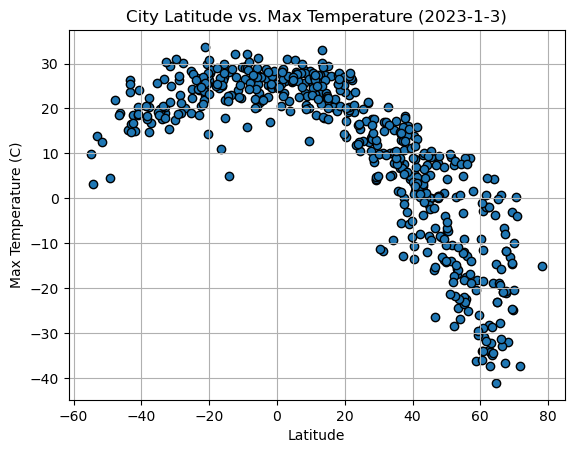

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-1-3)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude Vs. Humidity

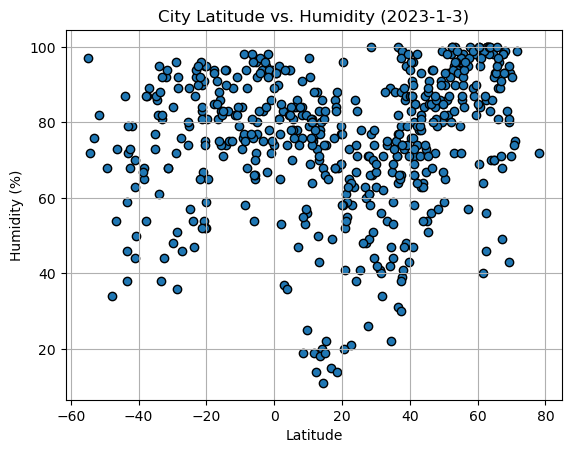

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-1-3)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude Vs. Cloudiness

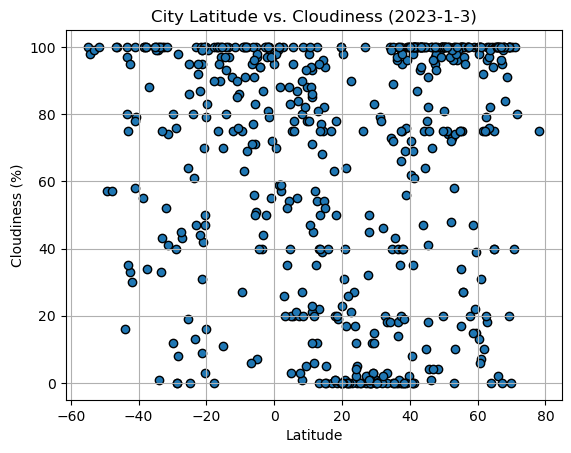

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-1-3)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

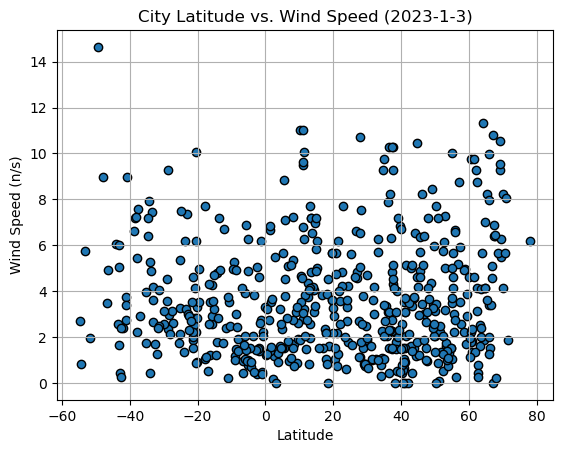

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-1-3)")
plt.ylabel("Wind Speed (n/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0         malmberget  67.1753   20.6549    -36.69        68          95   
3        yellowknife  62.4560 -114.3525    -28.10        86          75   
4             albany  42.6001  -73.9662      2.36        78         100   
6         hanceville  34.0607  -86.7675      5.09        89         100   
7         slave lake  55.2834 -114.7690     -9.01        86         100   

         Wind Speed Country        Date  
City_ID                                  
0              0.00      SE  1704327037  
3              4.12      CA  1704326746  
4              1.55      US  1704326812  
6              0.79      US  1704327040  
7              5.66      CA  1704326873

In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                       
1                         carutapera  -1.1950  -46.0200     24.96        94   
2                           waitangi -43.9535 -176.5597     15.10        87   
5                              mbeya  -8.9000   33.4500     15.90        98   
8        edinburgh of the seven seas -37.0676  -12.3116     16.84        89   
9                      blackmans bay -43.0167  147.3167     16.52        72   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
1                99        2.75      BR  1704327037  
2                16        6.05      NZ  1704327038  
5               100        1.18      TZ  1704327039  
8                88        2.91      SH  1704327041  
9                75        0.45      AU  1704327041

## Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.753969941764773


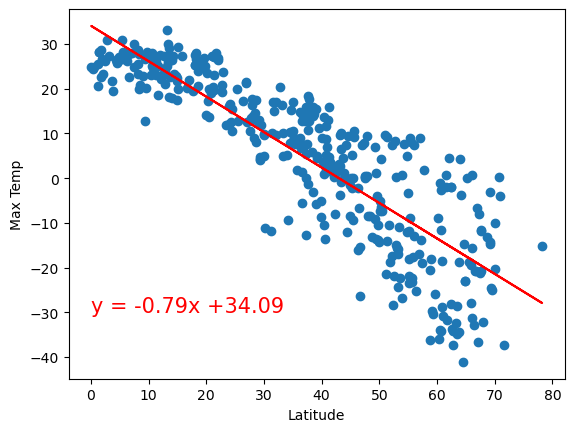

In [15]:
# Linear regression on Northern Hemisphere

# Create a Scatter Plot for temperature vs latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(0, -30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.2864418033090014


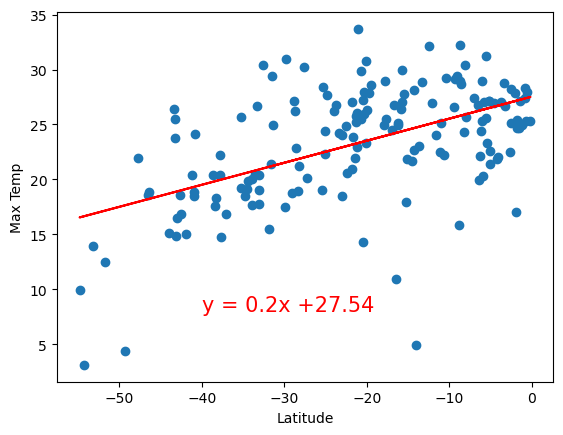

In [26]:
# Linear regression on Southern Hemisphere

# Create a Scatter Plot for temperature vs latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-40, 8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Linear Relationship Observation: Temperature vs. Latitude

In the Northern Hemisphere, there is a negative correlation between max temperature and latitude – as the latitude increases the max temperature decreases. The correlation is considered a stronger one with an r-value of 0.753969941764773.

Conversely, in the Southern Hemisphere, there is a positive correlation between max temperature and latitude – as the latitude increases, the max temperature also increases. However, this correlation is not a strong one with an r-value of 0.2864418033090014.

## Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13169863260473436


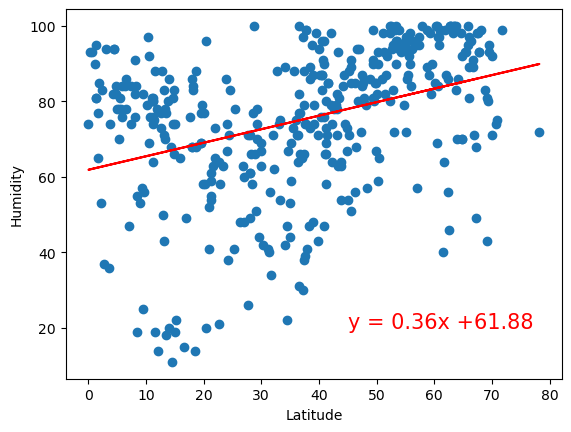

In [17]:
# Northern Hemisphere

# Create a Scatter Plot for humidity vs latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.119393197859179


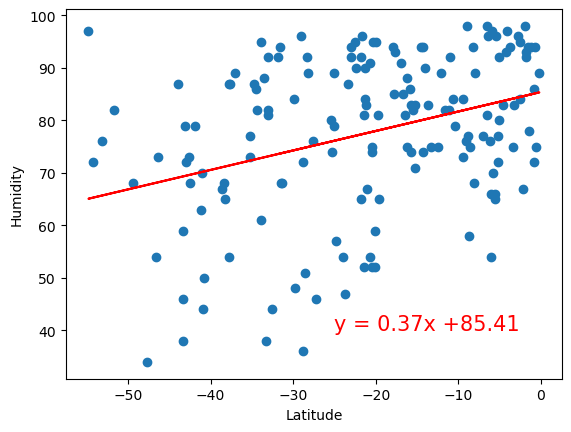

In [28]:
# Southern Hemisphere

# Create a Scatter Plot for humidity vs latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-25, 40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Linear Relationship Observation: Humidity vs. Latitude

In the Northern Hemisphere, there is a very slight positive correlation between humidity and latitude – as the latitude increases the humidity also increases. The correlation is considered very weak with an r-value of 0.13169863260473436.

In the Southern Hemisphere, there is also a very slight positive correlation between humidity and latitude – as the latitude increases, the humidity also increases. The correlation is a very weak one with an r-value of 0.119393197859179.

## Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07462223557315845


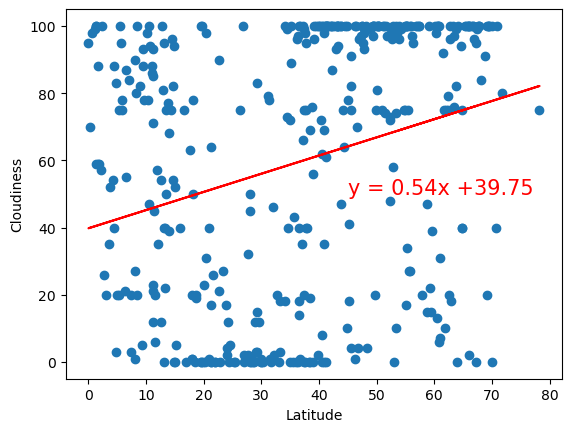

In [31]:
# Northern Hemisphere

# Create a Scatter Plot for temperature vs latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(45, 50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.006544355656811603


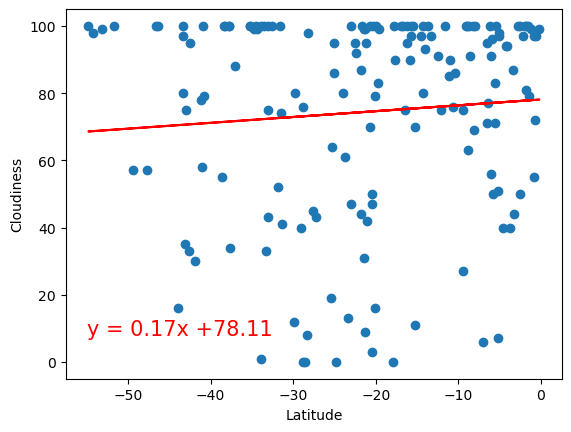

In [34]:
# Southern Hemisphere

# Create a Scatter Plot for temperature vs latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-55, 8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Linear Relationship Observation: Cloudiness vs. Latitude

In the Northern Hemisphere, there is no correlation between cloudiness and latitude with an r-value of 0.07462223557315845.

The same can be said in the Southern Hemisphere, there is no correlation between cloudiness and latitude with an r-value of 0.006544355656811603.

## Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007829235825488182


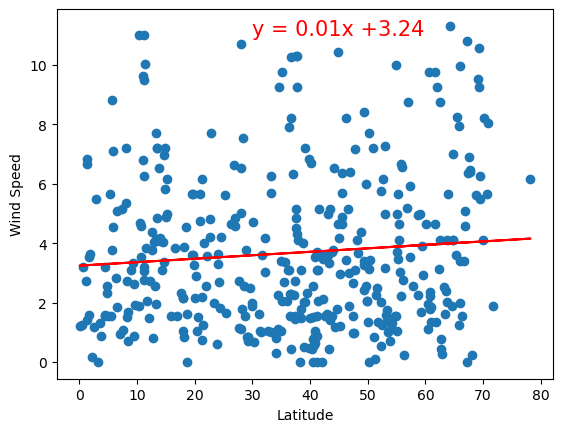

In [38]:
# Northern Hemisphere

# Create a Scatter Plot for temperature vs latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(30, 11),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.10545906573331992


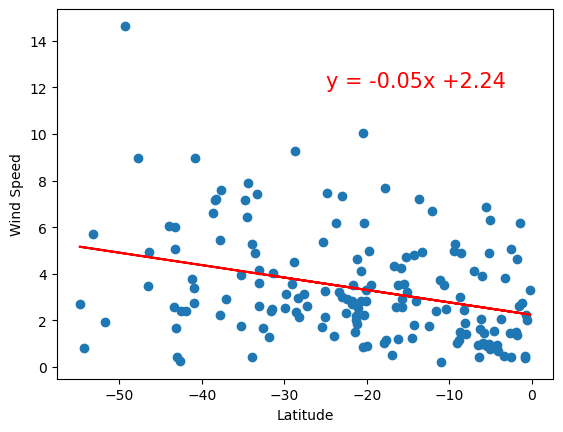

In [22]:
# Southern Hemisphere

# Create a Scatter Plot for temperature vs latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-25, 12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Linear Relationship Observation: Wind Speed vs. Latitude

In the Northern Hemisphere, there is no correlation between wind speed and latitude with an r-value of 0.007829235825488182.

In the Southern Hemisphere, there is a slight negative correlation between wind speed and latitude – as the latitude increases, the wind speed decreases. The correlation is weak with an r-value of 0.10545906573331992.